In [1]:
# Importamos nuestra librerías básicas
import numpy as np
import pandas as pd
import os
import itertools
import random
from sklearn.datasets import fetch_mldata
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

# Este paso es para que los resultados en vuestros notebooks sean iguales a lo de este
np.random.seed(42)


# Aprendizaje supervisado - Regresión Logistica

En este notebook vamos implementar la clasificación de digitos de la serie MNIST
En la mayoría de nuestros ejemplos utilizaremos la librería de Machine Learning 
Scikit-Learn.

# Como funciona la regresion logistica

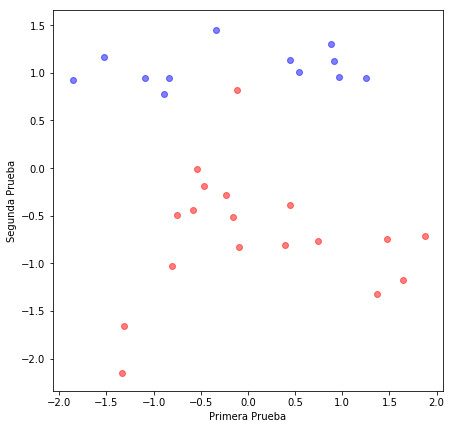

In [2]:
# Para empezar creamos un dataset ejemplo con sklearn
data = make_classification(n_samples=30, n_features=2, n_informative=2, n_redundant=0,
                           weights=[.6, .4], random_state=42)
# Separo entre *features* y el objetivo
scale = StandardScaler().fit(data[0])
features = scale.transform(data[0])
target = data[1]
# Dibujo las muestras
nok = features[target==0]
ok = features[target==1]
plt.figure(figsize=(7,7))
plt.xlabel("Primera Prueba")
plt.ylabel("Segunda Prueba")
plt.scatter(nok[:,0], nok[:,1], color="red", alpha=0.5)
plt.scatter(ok[:,0], ok[:,1], color="blue", alpha=0.5)
plt.show()

# Aplicamos la regresión logísitica para separar las muestras

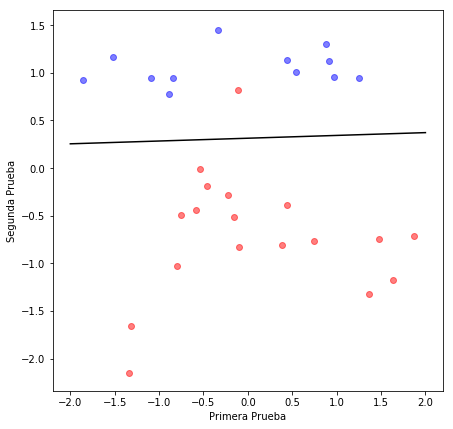

In [3]:
# Aplicamos la regresión logistica
log_reg = LogisticRegression().fit(features, target)
# Volvemos a dibujar las muestras
plt.figure(figsize=(7,7))
plt.xlabel("Primera Prueba")
plt.ylabel("Segunda Prueba")
plt.scatter(nok[:,0], nok[:,1], color="red", alpha=0.5)
plt.scatter(ok[:,0], ok[:,1], color="blue", alpha=0.5)
lin = np.array([-2,2])
w0 = log_reg.intercept_
w1,w2 = log_reg.coef_[0]
plt.plot(lin,(-w0-w1*lin)/w2,"k-")
plt.show()

# Ahora vamos aplicar la regresión logística a un dataset más complicado

In [2]:
# Aqui importamos los datos que vamos a clasificar

# Scikit-Learn ya incluye algunos datasets de ejemplo como el MNIST
mnist = fetch_mldata('MNIST original')

# El dataset contiene 70.000 ejemplos de digitos escritos a mano
# en blanco y negro. Cada digito esta representada por una imagen de 28x28 pixels.
# Además el dataset incluye el "target" i.e. el numero asociado con cada imagen.

# Otros datasets serían más rápidos de ejecutar, pero la ventaja de este es que,
# debido a su complejidad, cuando empecemos a utilizar modelos más complejos (como 
# redes neuronales), se empezarán a ver las ventajas de estos modelos más complejos

# Aqui cargamos nuestros ejemplos en X, el target en y. Nuestro objetivo con
# Machine Learning es aprender la función f(X) que genera y.
X, y = mnist["data"], mnist["target"]

## Separación del set de pruebas

In [3]:
# Nuestro objetivo es que la función aprendida funcione no solamente con
# el dataset de prueba, pero que también "generalize" bien para ejemplos
# que no haya visto antes.

# En esta sección separamos el dataset en 2 partes: el training set y test set
# utilizamos la función train_test_split para que los set sean "estratificados"
X_train_o, X_test_o, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


# Visualización de los datos

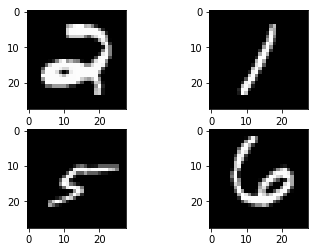

In [4]:
# Visualizar los datos que vamos utilizar nos permite entender mejor el problema
# en el caso de MNIST la tarea es compleja desde el punto de vista de la clasificación
# pero los datos ya están perfectos para el tratamiento (sin outliers, valores faltantes, etc)
fig=plt.figure()
a=fig.add_subplot(2,2,1)
plt.imshow(np.reshape(X_train_o[1], [28, 28]),cmap="gray")
a=fig.add_subplot(2,2,2)
plt.imshow(np.reshape(X_train_o[2], [28, 28]),cmap="gray")
a=fig.add_subplot(2,2,3)
plt.imshow(np.reshape(X_train_o[3], [28, 28]),cmap="gray")
a=fig.add_subplot(2,2,4)
plt.imshow(np.reshape(X_train_o[4], [28, 28]),cmap="gray")
plt.show();

# Normalización de los datos (aka Feature Engineering)

In [5]:
# Antes de enviar los datos al modelo, hacemos una adaptación de los datos para normalizarlos
# Por normalización en este contexto la idea es remover la media de cada "feature"
# (i.e. centrar en zero) y dividir por la "variance", es decir hacer que los datos estén entre
# 0 y 1.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_o)
X_test = scaler.transform(X_test_o)


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Regresión Logistica

In [6]:
# El problema que vamos a classificar tiene 768 dimensiones de entrada (28x28)
# La regresión logistica intentará definir una "línea" en este espacio multidimensional
# que mejor represente el dato

# Creamos el modelo que queremos usar
# Para la regresión logistica, hemos indicado que el modelo es para una
# clasificacion de multiplas clases
lr_clf = LogisticRegression(multi_class='multinomial', solver='saga', random_state=42, tol=0.1)

# Hacemos fit del modelo al dato de training
%time lr_clf.fit(X_train, y_train)

# Nosotros medimos el tiempo de entrenamiento porque es un parametro para entender el rendimiento
# del modelo

Wall time: 12.3 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='saga', tol=0.1,
          verbose=0, warm_start=False)

# Evaluación del Modelo

- Exactitud - Accuracy
- *Confusion Matrix*

  - Precisión - Alta precision, pocos falsos positivos - $P=\frac{T_{P}}{T_{P}+F_{P}}$

 - "Retirada" - Alto *Recall*, pocos falsos negativos - $R=\frac{T_{P}}{T_{P}+F_{N}}$


# Evaluación del Modelo - Exactitud

In [7]:
# Los modelos de Scikit-Learn ya vienen con funciones para evaluar el rendimiento del modelo
# Con este modelo sencillo hemos podido alcanzar una "exactitud" de mis previsiones de casi 90%
# Usamos "exactitud" para diferenciar de precisión que significa otra cosa en nuestras medidas
# rendimiento.

# Comparar la exactitud entre el set de entrenamiento y el de pruebas nos permite entender si
# esta ocurriendo overfitting
%time train_score = lr_clf.score(X_train, y_train)
print("Rendimiento en el dataset de training: %.4f" % train_score)
%time cv_score = cross_val_score(lr_clf, X_train, y_train, cv=5)
print("Rendimiento en la cross validación: %.4f" % cv_score.mean())
%time score = lr_clf.score(X_test, y_test)
print("Rendimiento en el dataset de pruebas: %.4f" % score)


Wall time: 128 ms
Rendimiento en el dataset de training: 0.8895
Wall time: 49.7 s
Rendimiento en la cross validación: 0.8822
Wall time: 24.6 ms
Rendimiento en el dataset de pruebas: 0.8945


# Evaluación del Modelo - *Confusion Matrix*


In [8]:
# Esta función esta adaptada de la documentación del Scikit-Learn para presentar
# la matrix de "confusión" de forma más visual
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')
        

    #print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel("Valor real")
    plt.xlabel("Predicción")
    plt.show()


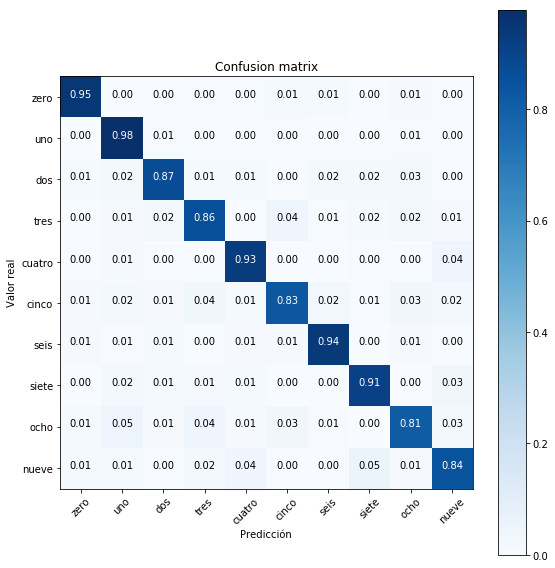

In [9]:
# La confusion matrix nos presenta una información sumaria de la precisión y del recall
cm=confusion_matrix(y_test, lr_clf.predict(X_test))
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, classes=["zero","uno","dos","tres","cuatro","cinco","seis","siete","ocho","nueve"], normalize=True);